In [ ]:
import tensorflow as tf
print(('Your TensorFlow version: {0}').format(tf.__version__))

Your TensorFlow version: 2.15.0


In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, datetime, scipy




In [ ]:
# Create a constant tensor A
A = tf.constant([[4 ,3],
                  [6, 1]])

In [ ]:
B = tf.constant([[7 ,8],
                 [4, 5]])

In [ ]:
# Create a variable tensor V
V = tf.Variable([[3, 1],
                 [5, 2]])

In [ ]:
# Concatenate columns
# axis 1, by row
AB_concatenated = tf.concat(values=[A,B], axis=1)
AB_concatenated

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[4, 3, 7, 8],
       [6, 1, 4, 5]], dtype=int32)>

In [ ]:
# Concatenate columns
# axis 0, by column
AB_concatenated = tf.concat(values=[A,B], axis=0)
AB_concatenated

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[4, 3],
       [6, 1],
       [7, 8],
       [4, 5]], dtype=int32)>

In [ ]:
tensor = tf.zeros(shape=[3,4], dtype=tf.int32)
tensor

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)>

In [ ]:
tensor2 = tf.random.uniform(shape=[3,4], dtype=tf.float32)
tensor2

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.5311574 , 0.4896567 , 0.39075792, 0.74319875],
       [0.30543995, 0.58184993, 0.6627476 , 0.49412858],
       [0.64445734, 0.5990095 , 0.21454132, 0.11056995]], dtype=float32)>

In [ ]:
# Reshape the tensor
reshaped_tensor = tf.reshape(tensor = tensor2,shape =[4,3])
reshaped_tensor

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[0.5311574 , 0.4896567 , 0.39075792],
       [0.74319875, 0.30543995, 0.58184993],
       [0.6627476 , 0.49412858, 0.64445734],
       [0.5990095 , 0.21454132, 0.11056995]], dtype=float32)>

In [ ]:
# Typecast a tensor
tensor3 = tf.constant([[4.6, 4.2],
                      [7.5, 3.6],
                      [2.7, 9.4],
                      [6.7, 8.3]],
                      dtype= tf.float32)
tensor3_as_int = tf.cast(tensor3, tf.int32)

print(tensor3)
print(tensor3_as_int)

tf.Tensor(
[[4.6 4.2]
 [7.5 3.6]
 [2.7 9.4]
 [6.7 8.3]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[4 4]
 [7 3]
 [2 9]
 [6 8]], shape=(4, 2), dtype=int32)


In [ ]:
# Transpose
a = tf.transpose(tensor3_as_int)
a

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[4, 7, 2, 6],
       [4, 3, 9, 8]], dtype=int32)>

In [ ]:
# Matrix multification of tensors
A = tf.constant([[4 ,3],
                  [6, 1]])

C = tf.constant([[7 ],
                 [4]])

AC = tf.matmul(A, C)
AC


<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[40],
       [46]], dtype=int32)>

In [ ]:

AB = tf.matmul(A, B)
AB

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[40, 47],
       [46, 53]], dtype=int32)>

In [ ]:
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
# Import functions from keras and sklearn libraries
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
air_quality = pd.read_csv('/content/drive/MyDrive/Artificial Intelligence & Machine Learning/air_quality.csv')
air_quality

,Date,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
0,2014-01-01 01:00,6,7,9,8.0,6.0,6.0,6.0,8,6.0,6.0,6,4.0,10,7,9.0
1,2014-01-01 02:00,6,7,9,7.0,6.0,5.0,6.0,8,5.0,5.0,6,4.0,10,7,9.0
2,2014-01-01 03:00,6,6,8,7.0,6.0,5.0,6.0,7,5.0,5.0,6,5.0,9,6,8.0
3,2014-01-01 04:00,6,6,8,7.0,6.0,5.0,6.0,7,4.0,5.0,6,4.0,9,5,8.0
4,2014-01-01 05:00,5,5,7,6.0,5.0,5.0,NaN,7,5.0,5.0,5,4.0,8,5,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2014-01-28 08:00,4,4,4,4.0,4.0,4.0,4.0,4,4.0,4.0,4,3.0,4,4,4.0
656,2014-01-28 09:00,4,4,4,4.0,4.0,4.0,4.0,4,4.0,4.0,4,4.0,5,5,4.0
657,2014-01-28 10:00,4,4,4,4.0,4.0,5.0,4.0,4,4.0,4.0,4,4.0,5,5,4.0
658,2014-01-28 11:00,4,4,4,4.0,5.0,5.0,5.0,5,5.0,4.0,4,4.0,5,5,5.0


In [ ]:
air_quality.head(3)

,Date,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
0,2014-01-01 01:00,6,7,9,8.0,6.0,6.0,6.0,8,6.0,6.0,6,4.0,10,7,9.0
1,2014-01-01 02:00,6,7,9,7.0,6.0,5.0,6.0,8,5.0,5.0,6,4.0,10,7,9.0
2,2014-01-01 03:00,6,6,8,7.0,6.0,5.0,6.0,7,5.0,5.0,6,5.0,9,6,8.0


In [ ]:
air_quality.describe()

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
count,660.000000,660.000000,660.000000,659.000000,652.000000,651.000000,648.000000,660.000000,649.000000,643.000000,660.000000,648.000000,660.000000,660.000000,657.000000
mean,5.209091,4.698485,5.445455,5.327769,5.217791,5.159754,5.348765,5.439394,5.351310,4.749611,5.028788,4.978395,6.303030,6.153030,5.617960
std,1.420181,1.310051,1.500145,1.454059,1.408267,1.470419,1.511000,1.565260,1.594697,1.284152,1.449427,1.589036,1.699502,1.645126,1.636618
min,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.250000,6.000000,6.000000,6.000000,6.000000,8.000000,7.000000,7.000000
max,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000


In [ ]:
air_quality2 = air_quality.groupby(['Date']).mean()
air_quality2

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,,
2014-01-01 01:00,6.0,7.0,9.0,8.0,6.0,6.0,6.0,8.0,6.0,6.0,6.0,4.0,10.0,7.0,9.0
2014-01-01 02:00,6.0,7.0,9.0,7.0,6.0,5.0,6.0,8.0,5.0,5.0,6.0,4.0,10.0,7.0,9.0
2014-01-01 03:00,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,5.0,5.0,6.0,5.0,9.0,6.0,8.0
2014-01-01 04:00,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,4.0,5.0,6.0,4.0,9.0,5.0,8.0
2014-01-01 05:00,5.0,5.0,7.0,6.0,5.0,5.0,NaN,7.0,5.0,5.0,5.0,4.0,8.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-28 08:00,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0
2014-01-28 09:00,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0
2014-01-28 10:00,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0


In [ ]:
# Calculate the quantile of each variable

def calculate_quantile(i, air_quality2):
  Q1 = air_quality2[[i]].quantile(0.25)[0]
  Q3 = air_quality2[[i]].quantile(0.75)[0]
  IQR = Q3 - Q1
  min = air_quality2[[i]].min()[0]
  max = air_quality2[[i]].max()[0]
  min_IQR =Q1 - 1.5*IQR
  max_IQR =Q3 - 1.5*IQR

  return (Q1, Q3, min, max, min_IQR, max_IQR)



In [ ]:
# Delete first and last rows to avaoid missing values
air_quality2.drop(index=[air_quality2.index[0], air_quality2.index[air_quality2.shape[0]-1]])

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,,
2014-01-01 02:00,6.0,7.0,9.0,7.0,6.0,5.0,6.0,8.0,5.0,5.0,6.0,4.0,10.0,7.0,9.0
2014-01-01 03:00,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,5.0,5.0,6.0,5.0,9.0,6.0,8.0
2014-01-01 04:00,6.0,6.0,8.0,7.0,6.0,5.0,6.0,7.0,4.0,5.0,6.0,4.0,9.0,5.0,8.0
2014-01-01 05:00,5.0,5.0,7.0,6.0,5.0,5.0,NaN,7.0,5.0,5.0,5.0,4.0,8.0,5.0,7.0
2014-01-01 06:00,5.0,5.0,6.0,6.0,5.0,5.0,NaN,7.0,5.0,5.0,5.0,4.0,7.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-28 07:00,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0
2014-01-28 08:00,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0
2014-01-28 09:00,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0


In [ ]:
# Find and interpolate the outliers
for i in air_quality2.columns:
  print('\nAttribute-', i, ':')
  Q1, Q3, min, max, min_IQR, max_IQR = calculate_quantile(i, air_quality2)
  print('Q1 = %.2f' %Q1)
  print('Q3 = %.2f' %Q3)
  print('min_IQR = %.2f' %min_IQR)
  print('max_IQR = %.2f' %max_IQR)
  if (min < min_IQR):
    print('---> Low outlier is found = %.2f' %min)
  if (max > max_IQR):
    print('---> High outlier is found = %.2f' %max)



Attribute- Central/Western :
Q1 = 4.00
Q3 = 6.00
min_IQR = 1.00
max_IQR = 3.00
---> High outlier is found = 9.00

Attribute- Eastern :
Q1 = 4.00
Q3 = 6.00
min_IQR = 1.00
max_IQR = 3.00
---> High outlier is found = 9.00

Attribute- Kwun Tong :
Q1 = 4.00
Q3 = 6.00
min_IQR = 1.00
max_IQR = 3.00
---> High outlier is found = 10.00

Attribute- Sham Shui Po :
Q1 = 4.00
Q3 = 6.00
min_IQR = 1.00
max_IQR = 3.00
---> High outlier is found = 10.00

Attribute- Kwai Chung :
Q1 = 4.00
Q3 = 6.00
min_IQR = 1.00
max_IQR = 3.00
---> High outlier is found = 10.00

Attribute- Tsuen Wan :
Q1 = 4.00
Q3 = 6.00
min_IQR = 1.00
max_IQR = 3.00
---> High outlier is found = 10.00

Attribute- Yuen Long :
Q1 = 4.00
Q3 = 6.00
min_IQR = 1.00
max_IQR = 3.00
---> High outlier is found = 10.00

Attribute- Tuen Mun :
Q1 = 4.00
Q3 = 6.25
min_IQR = 0.62
max_IQR = 2.88
---> High outlier is found = 10.00

Attribute- Tung Chung :
Q1 = 4.00
Q3 = 6.00
min_IQR = 1.00
max_IQR = 3.00
---> High outlier is found = 10.00

Attribute- T

In [ ]:
# Log transformation to deal with skewed data
dataset = np.log1p(air_quality2[['Kwun Tong']].values)
dataset.shape

(660, 1)

<Figure size 1000x300 with 0 Axes>

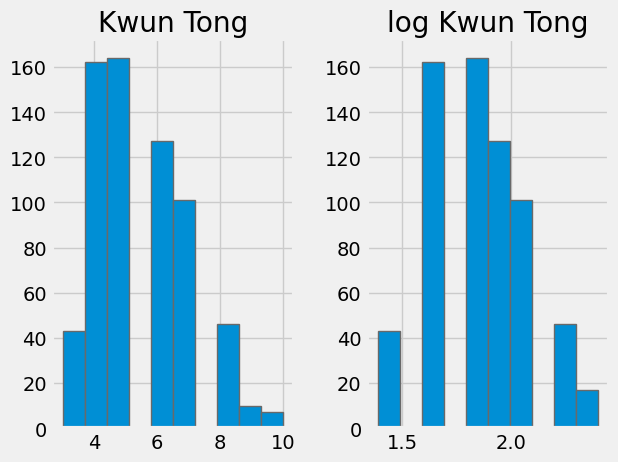

In [ ]:
# Create new dataframe to compare  the original vs log transform data
new_air_quality2 = pd.DataFrame({'Kwun Tong' : air_quality2['Kwun Tong'].values, 'log Kwun Tong' : dataset[:,0]})

# Histogram plot original vs Log transform data
plt.figure(figsize=(10,3))
new_air_quality2.hist();

In [ ]:
# Split the dataset into training and testing sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0 : train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

495 165


In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back-1):
    a = dataset[i :(i + look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

# Reshape the train and test data
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('Shape of trainX :', trainX.shape)
print('Shape of trainY :', trainY.shape)
print('Shape of testX :', testX.shape)
print('Shape of testY :', testY.shape)

Shape of trainX : (493, 1)
Shape of trainY : (493,)
Shape of testX : (163, 1)
Shape of testY : (163,)


In [ ]:
# Reshape the input array in the form - [samples, time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print('Shape of trainX:', trainX.shape)
print('Shape of testX:', testX.shape)

Shape of trainX: (493, 1, 1)
Shape of testX: (163, 1, 1)


In [ ]:
# Create and fit the LSTM Neural Network
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer ='adam')
model.fit(trainX, trainY, epochs = 500, batch_size = 32, verbose = 2)

Epoch 1/500
16/16 - 2s - loss: 3.3137 - 2s/epoch - 133ms/step
Epoch 2/500
16/16 - 0s - loss: 3.1674 - 37ms/epoch - 2ms/step
Epoch 3/500
16/16 - 0s - loss: 3.0215 - 51ms/epoch - 3ms/step
Epoch 4/500
16/16 - 0s - loss: 2.8761 - 37ms/epoch - 2ms/step
Epoch 5/500
16/16 - 0s - loss: 2.7312 - 38ms/epoch - 2ms/step
Epoch 6/500
16/16 - 0s - loss: 2.5874 - 37ms/epoch - 2ms/step
Epoch 7/500
16/16 - 0s - loss: 2.4437 - 39ms/epoch - 2ms/step
Epoch 8/500
16/16 - 0s - loss: 2.3011 - 44ms/epoch - 3ms/step
Epoch 9/500
16/16 - 0s - loss: 2.1598 - 42ms/epoch - 3ms/step
Epoch 10/500
16/16 - 0s - loss: 2.0198 - 39ms/epoch - 2ms/step
Epoch 11/500
16/16 - 0s - loss: 1.8816 - 37ms/epoch - 2ms/step
Epoch 12/500
16/16 - 0s - loss: 1.7459 - 40ms/epoch - 3ms/step
Epoch 13/500
16/16 - 0s - loss: 1.6136 - 35ms/epoch - 2ms/step
Epoch 14/500
16/16 - 0s - loss: 1.4849 - 37ms/epoch - 2ms/step
Epoch 15/500
16/16 - 0s - loss: 1.3605 - 36ms/epoch - 2ms/step
Epoch 16/500
16/16 - 0s - loss: 1.2410 - 38ms/epoch - 2ms/step
E

In [ ]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = np.expm1(trainPredict)
trainY = np.expm1(trainY)
testPredict = np.expm1(testPredict)
testY = np.expm1(testY)

print(trainPredict, testPredict)



6/6 [==============================] - 0s 3ms/step
[[8.444255 ]
 [8.444255 ]
 [7.700302 ]
 [7.700302 ]
 [6.887726 ]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [5.0529375]
 [5.0529375]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [6.887726 ]
 [6.887726 ]
 [6.887726 ]
 [6.887726 ]
 [7.700302 ]
 [7.700302 ]
 [7.700302 ]
 [6.887726 ]
 [6.887726 ]
 [6.887726 ]
 [6.0045166]
 [6.0045166]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [6.0045166]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [5.0529375]
 [4.0424614]
 [4.0424614]
 [4.0424614]
 [4.0424614]
 [5.0529375]
 [6.0045166]
 [6.0045166]
 [6.887726 ]
 [6.887726 ]
 [6.887726 ]
 [6.887726 ]
 [7.700302 ]
 [8.444255 ]
 [9.123871 ]
 [9.123871 ]
 [9.123871 ]
 [9.123871 ]
 [9.123871 ]
 [9.123871 ]
 [9.123871 ]
 [8.444255 ]
 [8.444255 ]
